In [2]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, count
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Initialize Spark Session
spark = SparkSession.builder.appName("TelcoChurnAnalysis").getOrCreate()


In [4]:

# Load dataset
file_path = "telco_churn.csv"
df = pd.read_csv(file_path)

In [5]:

# Display basic information
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   object 
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     4774 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    4392 non-null   object 
 11  OnlineBackup      4392 non-null   object 
 12  DeviceProtection  4392 non-null   object 
 13  TechSupport       4392 non-null   object 
 14  StreamingTV       4392 non-null   object 
 15  StreamingMovies   4392 non-null   object 
 16  Contract          5043 non-n

In [6]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


In [7]:
import pandas as pd

# Load the dataset
file_path = "telco_churn.csv"
df = pd.read_csv(file_path)

# Drop duplicate CustomerID records
if 'customerID' in df.columns:
    df = df.drop_duplicates(subset='customerID', keep='first')

# Fill missing values
if 'MultipleLines' in df.columns:
    df['MultipleLines'].fillna('No', inplace=True)

for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    if col in df.columns:
        df[col].fillna('No internet service', inplace=True)

if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric
    df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)  # Estimate missing values

if 'Churn' in df.columns:
    df['Churn'].fillna(df['Churn'].mode()[0], inplace=True)
    
# Apply median imputation for TotalUsage if it exists in the dataset
if 'TotalUsage' in df.columns:
    df['TotalUsage'].fillna(df['TotalUsage'].median(), inplace=True)

# Convert CallDuration and MonthlyCharges to numeric if they exist
for col in ['CallDuration', 'MonthlyCharges']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


# Fix inconsistent data types
if 'CallDuration' in df.columns:
    df['CallDuration'] = pd.to_numeric(df['CallDuration'], errors='coerce')

# Save the cleaned dataset
cleaned_file_path = "telco_churn_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'telco_churn_cleaned.csv'

In [8]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
df.head(7)


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,No,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,3,7795-CFOCW,Male,False,False,False,45,False,No,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
5,5,9305-CDSKC,Female,False,False,False,8,True,True,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.500000,True
6,6,1452-KIOVK,Male,False,False,True,22,True,True,Fiber optic,...,False,False,True,False,Month-to-month,True,Credit card (automatic),89.099998,1949.400024,False


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   object 
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     4774 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    4392 non-null   object 
 11  OnlineBackup      4392 non-null   object 
 12  DeviceProtection  4392 non-null   object 
 13  TechSupport       4392 non-null   object 
 14  StreamingTV       4392 non-null   object 
 15  StreamingMovies   4392 non-null   object 
 16  Contract          5043 non-null   object 


In [8]:
#Checking for columns in the train dataset
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5043.0,1305.651993,801.484415,0.0,630.000,1260.000000,1890.500000,2999.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [10]:
#The number each of the categories occurs
print('The categories in the OnlineSecurity column are: ')
print(df['OnlineSecurity'].value_counts())

print('\n The categories in the gender column are: ')
print(df['gender'].value_counts())

print('\n The columns in the SeniorCitizen column are: ')
print(df['SeniorCitizen'].value_counts())

print('\n The categories in the partner column are: ')
print(df['Partner'].value_counts())

print('\n The categories in the paymentmethod column are: ')
print(df['PaymentMethod'].value_counts())

print('\n The categories in the contract column are: ')
print(df['Contract'].value_counts())

print('\n The categories in the StreamingMovies column are: ')
print(df['StreamingMovies'].value_counts())

print('\n The categories in the Techsupport column are: ')
print(df['TechSupport'].value_counts())

print('\n The categories in the paperless billing column are: ')
print(df['PaperlessBilling'].value_counts())

print('\n The categories in the streamming tv column are: ')
print(df['StreamingTV'].value_counts())

print('\n The categories in the device protection column are: ')
print(df['DeviceProtection'].value_counts())

The categories in the OnlineSecurity column are: 
OnlineSecurity
False                  1478
No                     1029
True                    871
Yes                     585
No internet service     429
Name: count, dtype: int64

 The categories in the gender column are: 
gender
Male      2559
Female    2484
Name: count, dtype: int64

 The columns in the SeniorCitizen column are: 
SeniorCitizen
False    2525
0        1699
True      475
1         344
Name: count, dtype: int64

 The categories in the partner column are: 
Partner
False    1538
True     1462
No       1047
Yes       996
Name: count, dtype: int64

 The categories in the paymentmethod column are: 
PaymentMethod
Electronic check             1700
Mailed check                 1128
Bank transfer (automatic)    1125
Credit card (automatic)      1090
Name: count, dtype: int64

 The categories in the contract column are: 
Contract
Month-to-month    2744
Two year          1244
One year          1055
Name: count, dtype: int64

 The 

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count
import time
import psutil


In [12]:

# Initialize Spark session
spark = SparkSession.builder.appName("TelecomDataAnalysis").getOrCreate()

# Load data
data_path = "telco_churn.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Select three columns for analysis
selected_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
df_selected = df.select(*selected_columns)

# Function to measure execution time and CPU utilization
def measure_performance(operation_func):
    start_time = time.time()
    cpu_before = psutil.cpu_percent(interval=None)
    
    result = operation_func()
    result.show()
    
    cpu_after = psutil.cpu_percent(interval=None)
    end_time = time.time()
    
    execution_time = end_time - start_time
    cpu_usage = cpu_after - cpu_before
    
    print(f"Execution Time: {execution_time:.4f} seconds")
    print(f"CPU Utilization Change: {cpu_usage:.2f}%")
    
    return result


In [13]:

# Operation 1: Aggregation (Average of numerical columns)
def aggregate():
    return df_selected.agg(
        avg(col("tenure")),
        avg(col("MonthlyCharges")),
        avg(col("TotalCharges"))
    )

# Operation 2: Filtering (Customers with high charges)
def filtering():
    return df_selected.filter(col("MonthlyCharges") > 80)

# Operation 3: Transformation (Adding a new column with normalized charges)
def transformation():
    max_charge = df_selected.agg({"MonthlyCharges": "max"}).collect()[0][0]
    return df_selected.withColumn("NormalizedCharges", col("MonthlyCharges") / max_charge)



In [14]:

# Measure performance of operations
print("Aggregation:")
measure_performance(aggregate)

print("Filtering:")
measure_performance(filtering)

print("Transformation:")
measure_performance(transformation)

# Stop Spark session
spark.stop()

Aggregation:
+----------------+-------------------+------------------+
|     avg(tenure)|avg(MonthlyCharges)| avg(TotalCharges)|
+----------------+-------------------+------------------+
|32.5766408883601|  65.09021416028149|2302.0628607304266|
+----------------+-------------------+------------------+

Execution Time: 1.1650 seconds
CPU Utilization Change: 10.10%
Filtering:
+------+------------------+------------------+
|tenure|    MonthlyCharges|      TotalCharges|
+------+------------------+------------------+
|     8|  99.6500015258789|             820.5|
|    22|  89.0999984741211|1949.4000244140625|
|    28|104.80000305175781| 3046.050048828125|
|    58| 100.3499984741211|  5681.10009765625|
|    49|103.69999694824219|   5036.2998046875|
|    25|             105.5| 2686.050048828125|
|    69|            113.25|  7895.14990234375|
|    71|106.69999694824219|           7382.25|
|    21| 90.05000305175781|1862.9000244140625|
|    47|  99.3499984741211|  4749.14990234375|
|    72|    

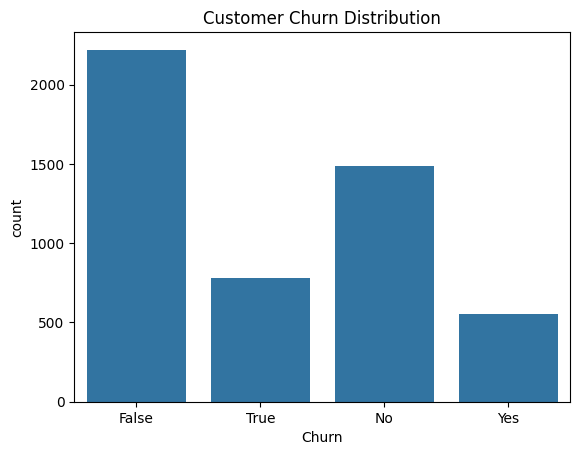

In [18]:

# Exploratory Data Analysis (EDA)
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

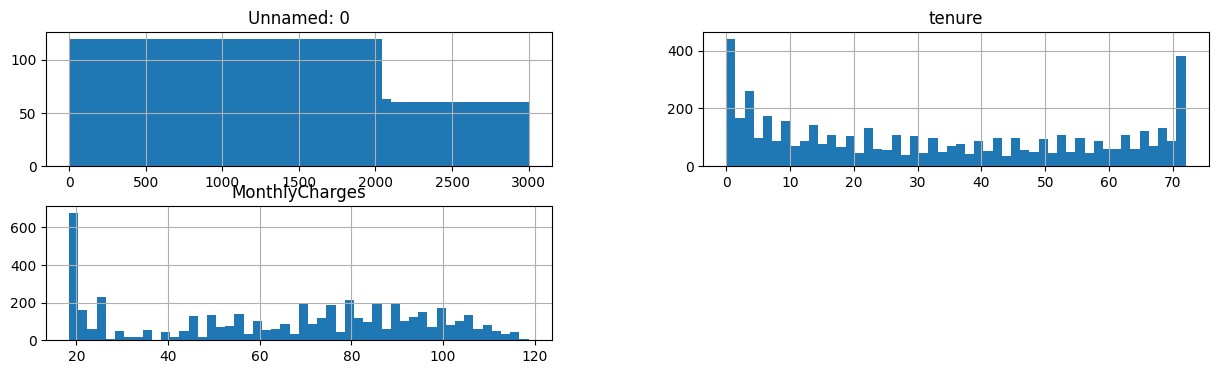

In [ ]:
df.hist(bins=50, figsize = (15,4))
plt.show

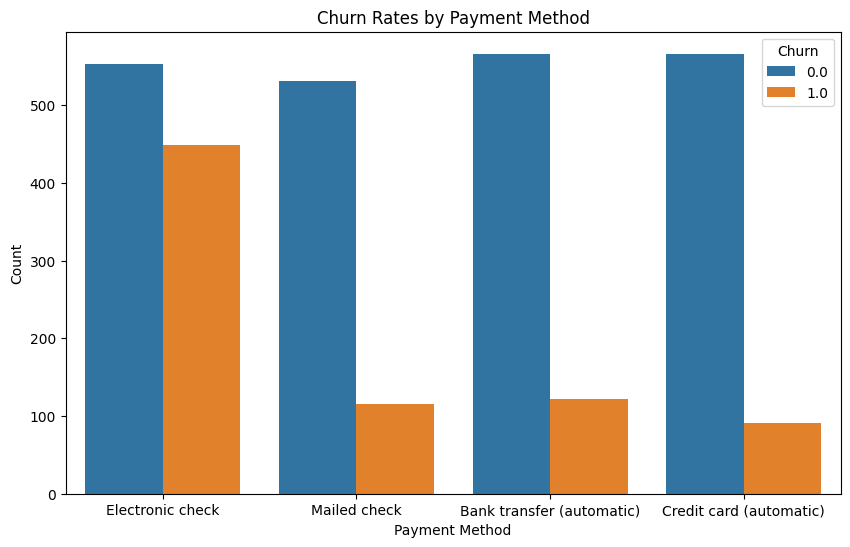

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Churn Rates by Payment Method')
plt.show()

Coorelation

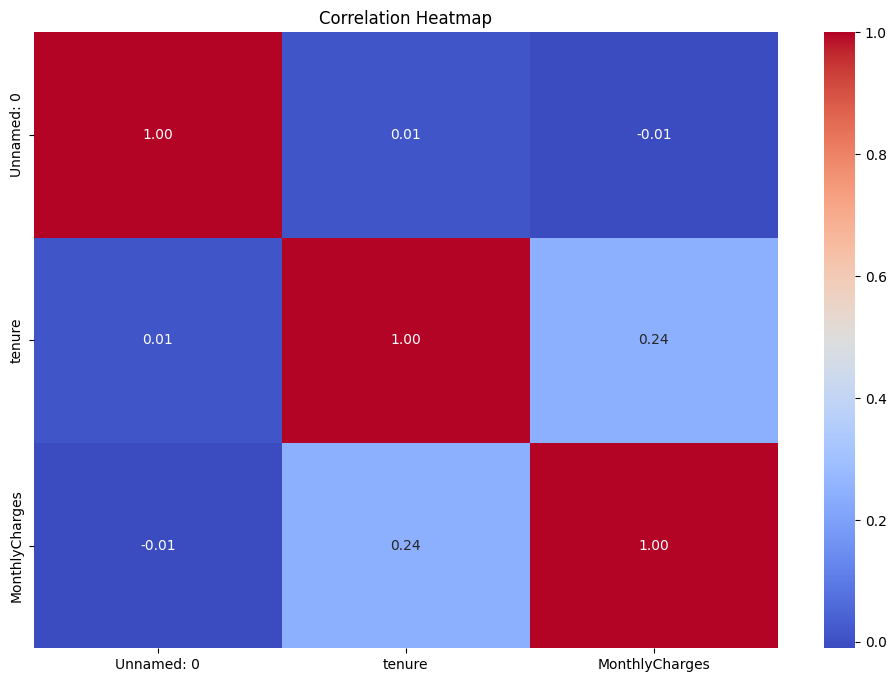

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('telco_churn.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


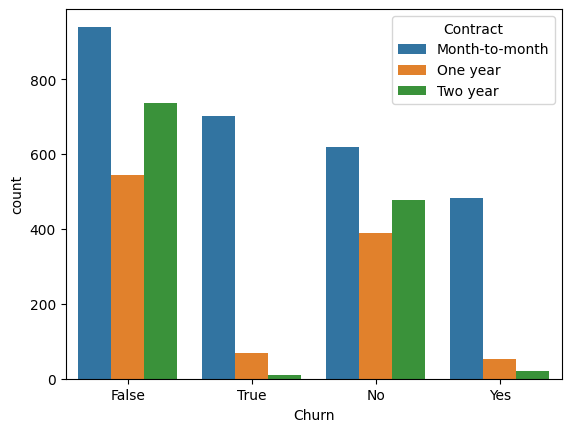

In [ ]:
#Churn report based on the type of contract
sns.countplot(x='Churn', data=df, hue='Contract')
plt.show()

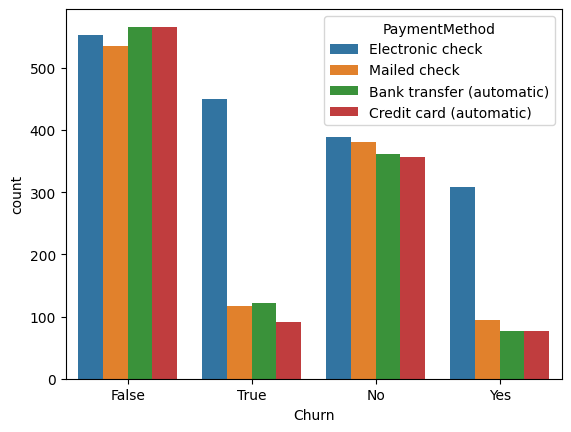

In [ ]:
#Churn report based on the payment method used
sns.countplot(x='Churn', hue='PaymentMethod', data=df)
plt.show()

The graph shouls the different payment methods and whether they churned or not.



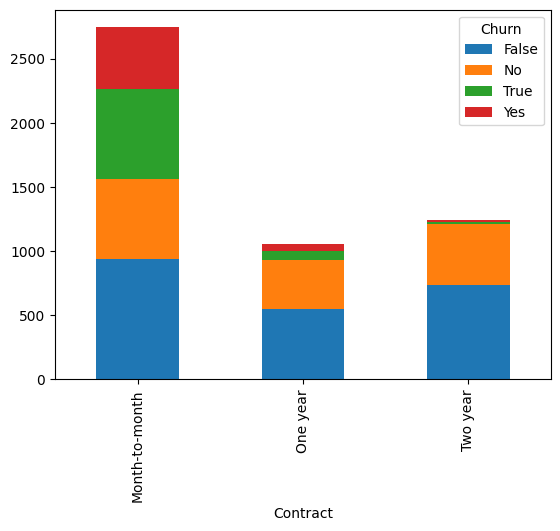

In [ ]:
#A stacked bar plot of Churn and Contract
cross_tab = pd.crosstab(df['Contract'], df['Churn'])
cross_tab.plot(kind='bar', stacked=True)
plt.show()

In [ ]:
# Cross-tabulate Churn and SeniorCitizen
cross_tab = pd.crosstab(df['Churn'], df['SeniorCitizen'])
print(cross_tab)

SeniorCitizen     0    1  False  True
Churn                                
False             0    0   1936   283
No             1291  196      0     0
True              0    0    588   192
Yes             408  148      0     0


In [19]:
# Ensure column names have no spaces
df.columns = df.columns.str.strip()

# Check if 'customerID' exists before dropping
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
else:
    print("Column 'customerID' not found in dataset.")


In [20]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print(df.columns)  # Check again


Index(['Unnamed: 0', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [21]:

# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(df)


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\pyspark\sql\pandas\conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


In [22]:
print(spark.version)


3.5.4


In [ ]:
from pyspark.sql import SparkSession

# Stop existing session
spark.stop()

# Start a new session with increased memory allocation
spark = SparkSession.builder \
    .appName("TelcoAnalysis") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()


In [ ]:
spark_df.printSchema()


root
 |-- Unnamed: 0: long (nullable = true)
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: long (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col, when

# Convert non-numeric values to null and cast column to double
spark_df = spark_df.withColumn(
    "TotalCharges",
    when(col("TotalCharges").rlike("^[0-9.]+$"), col("TotalCharges").cast("double")).otherwise(None)
)

# Drop nulls
spark_df = spark_df.na.drop(subset=["TotalCharges"])


In [ ]:
#Check If Spark is Running Properly
from pyspark.sql import SparkSession

# Stop existing session if any
try:
    spark.stop()
except:
    pass

# Start a new session with increased memory allocation
spark = SparkSession.builder \
    .appName("TelcoAnalysis") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()


In [ ]:
spark_df = spark.read.csv("telco_churn.csv", header=True, inferSchema=True)


In [ ]:
print(f"Spark Version: {spark.version}")
print(f"Total Rows: {spark_df.count()}")


Spark Version: 3.5.4
Total Rows: 5043


In [ ]:
spark_df.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [ ]:
pip install --upgrade pyspark


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Finding most data-using customers
spark_df.groupBy("customerID").agg(sum("MonthlyCharges").alias("TotalDataUsage"))\
    .orderBy(col("TotalDataUsage").desc()).show(5)


+----------+-----------------+
|customerID|   TotalDataUsage|
+----------+-----------------+
|8984-HPEMB|118.6500015258789|
|8199-ZLLSA|           118.35|
|9924-JPRMC|            118.2|
|9739-JLPQJ|            117.5|
|6650-BWFRT|117.1500015258789|
+----------+-----------------+
only showing top 5 rows



In [ ]:


# Finding frequently calling customers
spark_df.groupBy("customerID").agg(count("tenure").alias("UsageFrequency"))\
    .orderBy(col("UsageFrequency").desc()).show(5)


+----------+--------------+
|customerID|UsageFrequency|
+----------+--------------+
|3668-QPYBK|             1|
|6234-RAAPL|             1|
|1894-IGFSG|             1|
|6982-SSHFK|             1|
|5859-HZYLF|             1|
+----------+--------------+
only showing top 5 rows



In [ ]:

# Hive Queries (Example SQL-like queries for data warehousing)
queries = [
    "SELECT customerID, TotalCharges FROM telco_churn WHERE Churn='Yes' ORDER BY TotalCharges DESC LIMIT 5;",
    "SELECT gender, COUNT(*) AS count FROM telco_churn GROUP BY gender;",
    "SELECT PaymentMethod, AVG(MonthlyCharges) AS AvgCharge FROM telco_churn GROUP BY PaymentMethod;",
    "SELECT SeniorCitizen, COUNT(*) FROM telco_churn GROUP BY SeniorCitizen;"
]

print("\nHive Queries:")
for query in queries:
    print(query)



Hive Queries:
SELECT customerID, TotalCharges FROM telco_churn WHERE Churn='Yes' ORDER BY TotalCharges DESC LIMIT 5;
SELECT gender, COUNT(*) AS count FROM telco_churn GROUP BY gender;
SELECT PaymentMethod, AVG(MonthlyCharges) AS AvgCharge FROM telco_churn GROUP BY PaymentMethod;
SELECT SeniorCitizen, COUNT(*) FROM telco_churn GROUP BY SeniorCitizen;


DATA CLEANING

In [ ]:
print(df.columns)  # List all column names


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
# Check unique values in 'SeniorCitizen' to identify issues
df['SeniorCitizen'].unique()


array([0, 1])

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("telco_churn.csv")

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0", "customerID"], inplace=True, errors="ignore")

# Convert 'TotalCharges' to numeric, handling errors and filling missing values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)

# Convert 'SeniorCitizen' from 'False'/'True' strings to numeric (0,1)
df["SeniorCitizen"] = df["SeniorCitizen"].map({"False": 0, "True": 1, "0": 0, "1": 1}).astype(int)

# Fill missing values in categorical columns with 'No'
categorical_cols = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                    "TechSupport", "StreamingTV", "StreamingMovies"]
df[categorical_cols] = df[categorical_cols].fillna("No")

# Convert 'Churn' column to numeric (0 = No, 1 = Yes)
df["Churn"] = df["Churn"].map({"False": 0, "True": 1})

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Save cleaned dataset
df.to_csv("telco_churn_cleaned.csv", index=False)

# Display first few rows
print(df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0    True      False       1        False   
1    Male              0   False      False      34         True   
2    Male              0   False      False       2         True   
3    Male              0   False      False      45        False   
4  Female              0   False      False       2         True   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL          False         True            False   
1         False             DSL           True        False             True   
2         False             DSL           True         True            False   
3            No             DSL           True        False             True   
4         False     Fiber optic          False        False            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False       

In [ ]:
#Columns in the test dataset
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:

df['TechSupport']

0       False
1       False
2       False
3        True
4       False
        ...  
5038      Yes
5039       No
5040       No
5041       No
5042      Yes
Name: TechSupport, Length: 5030, dtype: object

Random Forest

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:

# Load the cleaned dataset
df = pd.read_csv("telco_churn_cleaned.csv")

# Drop rows where 'Churn' is NaN
df = df.dropna(subset=["Churn"])


In [5]:

# Convert categorical features into dummy variables
X = df.drop(columns=["Churn"])
X = pd.get_dummies(X, drop_first=True)  

# Define target variable
y = df["Churn"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],  
    "max_depth": [10, 20, 30],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4]
}


Optimized Model Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.96      0.89       450
          No       0.78      0.93      0.85       284
        True       0.79      0.44      0.56       156
         Yes       0.70      0.37      0.48       119

    accuracy                           0.80      1009
   macro avg       0.77      0.67      0.70      1009
weighted avg       0.79      0.80      0.78      1009



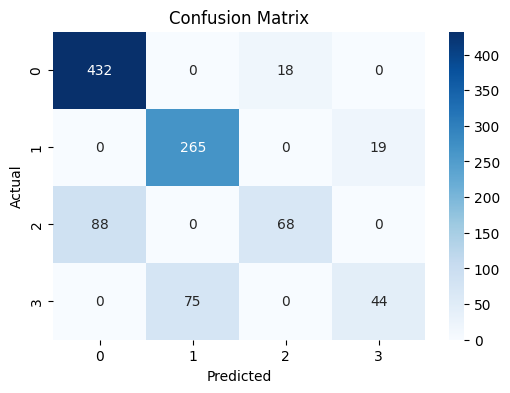

In [6]:

grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best model after tuning
best_rf_model = grid_search.best_estimator_

# Train the best model on the full training set
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Logistic Regression Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       449
         1.0       0.63      0.59      0.61       150

    accuracy                           0.81       599
   macro avg       0.75      0.74      0.74       599
weighted avg       0.81      0.81      0.81       599



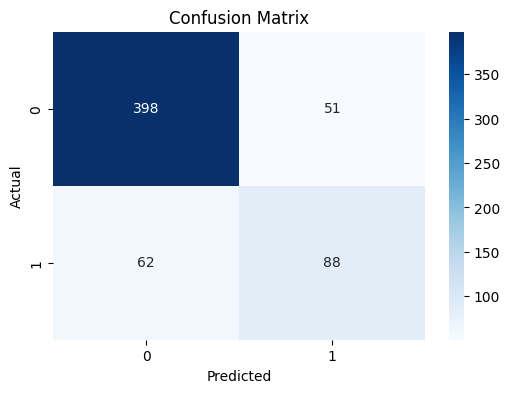

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("telco_churn_cleaned.csv")

# Drop rows where 'Churn' is NaN
df = df.dropna(subset=["Churn"])

# Convert categorical features into dummy variables
X = df.drop(columns=["Churn"])
X = pd.get_dummies(X, drop_first=True)  

# Define target variable
y = df["Churn"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
log_model = LogisticRegression(max_iter=1000, solver="liblinear")
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
